In [2]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [3]:
# Import training data
app_train = pd.read_csv("application_train.csv")
print("Shape of training data: ", app_train.shape)
app_train.head(10)

Shape of training data:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Import test data
app_test = pd.read_csv("application_test.csv")
print("Shape of test data: ", app_test.shape)
app_test.head(10)

Shape of test data:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [12]:
# Import columns description
col_desc = pd.read_csv("HomeCredit_columns_description.csv", usecols=["Table","Row", "Description"], encoding = "ISO-8859-1")
col_desc = col_desc[col_desc["Table"]=="application_{train|test}.csv"]
col_desc = col_desc.drop(columns=["Table"])
col_desc = col_desc.set_index("Row")
print("Shape of columns description: ", col_desc.shape)

pd.set_option('display.max_colwidth', None)

# for column in app_train.columns:
#     print(col_desc.loc[column])

print(col_desc.loc['TARGET'])

Shape of columns description:  (122, 1)
Description    Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
Name: TARGET, dtype: object


# Exploratory Data Analysis

In [13]:
# Distribution of target column values
app_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot: ylabel='Frequency'>

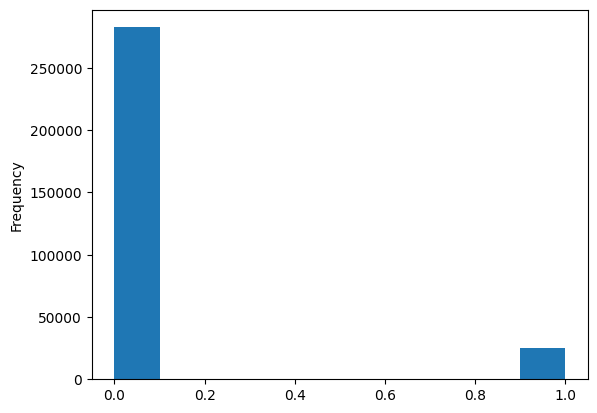

In [14]:
app_train["TARGET"].plot.hist()

The two classes are strongly unbalanced.

In [19]:
# Function for finding missing values
def find_missing(df):
    # Total number of missing values per column
    missing_vals = df.isnull().sum()
    # Percentage of missing values per column
    perc_missing_vals = 100*missing_vals/len(df)
    
    # Table with missing vals and percentages
    missing_vals_table = pd.concat([missing_vals,perc_missing_vals],axis=1)
    missing_vals_table = missing_vals_table.rename(columns={0:"Missing values", 1:"% of total values"})
    # Sort table in descending order (and drop columns with 0 missing vals)
    missing_vals_table = missing_vals_table[missing_vals_table["Missing values"] != 0].sort_values("% of total values",ascending=False).round(2)
    
    # Print additional information
    print(f"The dataframe has {df.shape[1]} columns in total.\n", f"There are {missing_vals_table.shape[0]} columns with missing values.")
    
    return missing_vals_table

In [20]:
# Find missing values in app_train
missing_values_train = find_missing(app_train)
missing_values_train.head(20)

The dataframe has 122 columns in total.
 There are 67 columns with missing values.


,Missing values,% of total values
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35


In [21]:
# Find missing values in app_test
missing_values_test = find_missing(app_test)
missing_values_test.head(20)

The dataframe has 121 columns in total.
 There are 64 columns with missing values.


,Missing values,% of total values
COMMONAREA_MODE,33495,68.72
COMMONAREA_MEDI,33495,68.72
COMMONAREA_AVG,33495,68.72
NONLIVINGAPARTMENTS_MEDI,33347,68.41
NONLIVINGAPARTMENTS_AVG,33347,68.41
NONLIVINGAPARTMENTS_MODE,33347,68.41
FONDKAPREMONT_MODE,32797,67.28
LIVINGAPARTMENTS_MODE,32780,67.25
LIVINGAPARTMENTS_MEDI,32780,67.25
LIVINGAPARTMENTS_AVG,32780,67.25


In [22]:
# Show different types of variables (columns)
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [23]:
# Show the number of unique classes for object-type columns
app_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Encoding Categorical Variables

In [24]:
le = LabelEncoder()
le_count = 0 # we want to count how many columns are encoded in this way

for col in app_train:
    if app_train[col].dtype == "object": # select only categorical columns
        if len(list(app_train[col].unique())) < 3: # select only two-cat columns
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            le_count += 1 # keep track of encoded columns
            print(col)

print("{} columns were encoded.".format(le_count))

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
3 columns were encoded.


In [25]:
# Check EMERGENCYSTATE_MODE column
print(col_desc.loc["EMERGENCYSTATE_MODE"], "\n")
print("Categories in the column:", app_train["EMERGENCYSTATE_MODE"].unique())

Description    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Name: EMERGENCYSTATE_MODE, dtype: object 

Categories in the column: ['No' nan 'Yes']


In [26]:
# Encoding the other categorical column with OHE
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print("Training shape: ", app_train.shape)
print("Test shape: ", app_test.shape)

Training shape:  (307511, 243)
Test shape:  (48744, 239)


In [27]:
# Fix train_app by keeping only common columns with test_app
target_col = app_train["TARGET"] # save the target column aside

app_train, app_test = app_train.align(app_test, join="inner", axis=1) # keep only common columns (also target is dropped)

app_train['TARGET'] = target_col # put back the target column

print("Training shape: ", app_train.shape)
print("Test shape: ", app_test.shape)

Training shape:  (307511, 240)
Test shape:  (48744, 239)


# Anomalies

In [29]:
print(col_desc.loc["DAYS_BIRTH"], "\n")

Description    Client's age in days at the time of application
Name: DAYS_BIRTH, dtype: object 



In [28]:
# Look for possible anomalies in DAYS_BIRTH
(app_train["DAYS_BIRTH"]/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [30]:
# Look for possible anomalies in DAYS_EMPLOYED
app_train["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot: title={'center': 'Days Employment Histogram'}, ylabel='Frequency'>

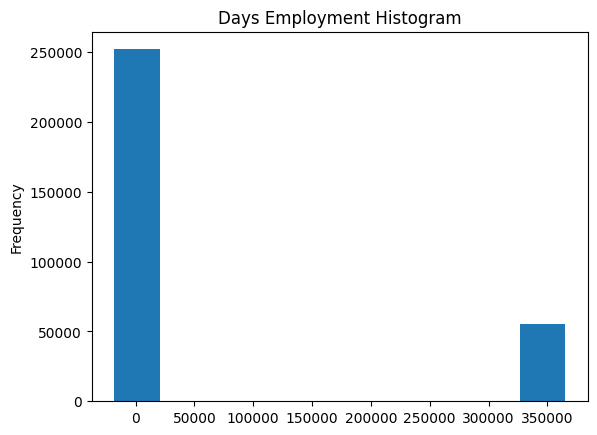

In [31]:
# We look closely at the data of DAYS_EMPLOYED with a histogram
app_train["DAYS_EMPLOYED"].plot.hist(title="Days Employment Histogram")


In [32]:
# Look at the values of the anomalies
list(app_train[app_train["DAYS_EMPLOYED"]>50000]["DAYS_EMPLOYED"].unique())


[365243]

<AxesSubplot: title={'center': 'Days Employment Histogram'}, ylabel='Frequency'>

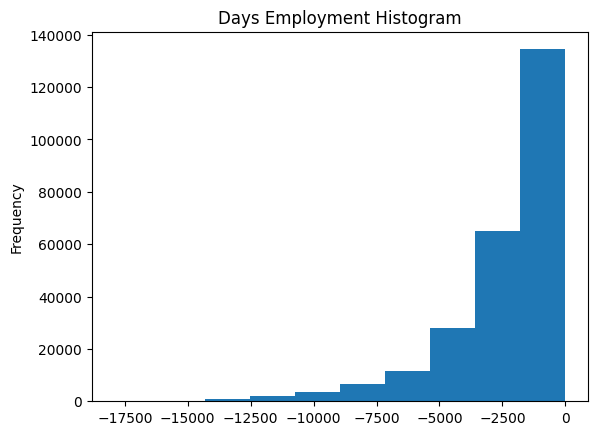

In [33]:
# Make a boolean flag for anomalies
app_train["DAYS_EMPLOYED_ANOMALIES"] = (app_train["DAYS_EMPLOYED"] == 365243)

# Replace anomalies with NaN
app_train["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)

# (IMPORTANT!) Repeat for app_test
app_test["DAYS_EMPLOYED_ANOMALIES"] = (app_test["DAYS_EMPLOYED"] == 365243)
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)

# Look again at the histogram
app_train["DAYS_EMPLOYED"].plot.hist(title="Days Employment Histogram")


In [34]:
# Check for other anomalies concerning days
days_cols = [col for col in app_train.columns if "DAYS" in col]
print(list(days_cols))

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED_ANOMALIES']


In [35]:
# Look for possible anomalies in DAYS_REGISTRATION
app_train["DAYS_REGISTRATION"].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [36]:
# Look for possible anomalies in DAYS_ID_PUBLISH
app_train["DAYS_ID_PUBLISH"].describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [37]:
# Look for possible anomalies in DAYS_LAST_PHONE_CHANGE
app_train["DAYS_LAST_PHONE_CHANGE"].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

# Correlation

In [39]:
# Find correlations with TARGET
correlation = app_train.corr()["TARGET"].sort_values()

# Show the most positive/negative columns related to TARGET
print("Most positive correlations:\n", correlation.tail(10))
print("Most negative correlations:\n", correlation.head(10))

Most positive correlations:
 REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
CODE_GENDER_M                  0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Most negative correlations:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
DAYS_EMPLOYED_ANOMALIES                -0.045987
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
Name: TARGET, dtype: fl

In [40]:
# Look at the column DAYS_BIRTH
col_desc.loc['DAYS_BIRTH']

Description    Client's age in days at the time of application
Name: DAYS_BIRTH, dtype: object

In [41]:
# Relate the positive days to target, As we have seen before, DAYS_BIRTH counts the days negatively 
app_train["DAYS_BIRTH"] = abs(app_train["DAYS_BIRTH"])
app_train["DAYS_BIRTH"].corr(app_train['TARGET'])

-0.07823930830982703

In [42]:
# Modify also app_test
app_test["DAYS_BIRTH"] = abs(app_test["DAYS_BIRTH"])

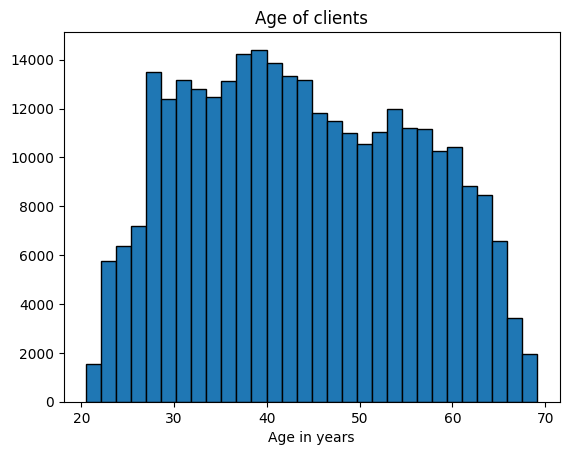

In [43]:
# Plot style
#plt.style.use('seaborn-v0_8-notebook')

# Histogram of age distribution (in years)
plt.hist(app_train['DAYS_BIRTH']/365, bins=30, edgecolor = 'k')
plt.title('Age of clients');
plt.xlabel('Age in years');

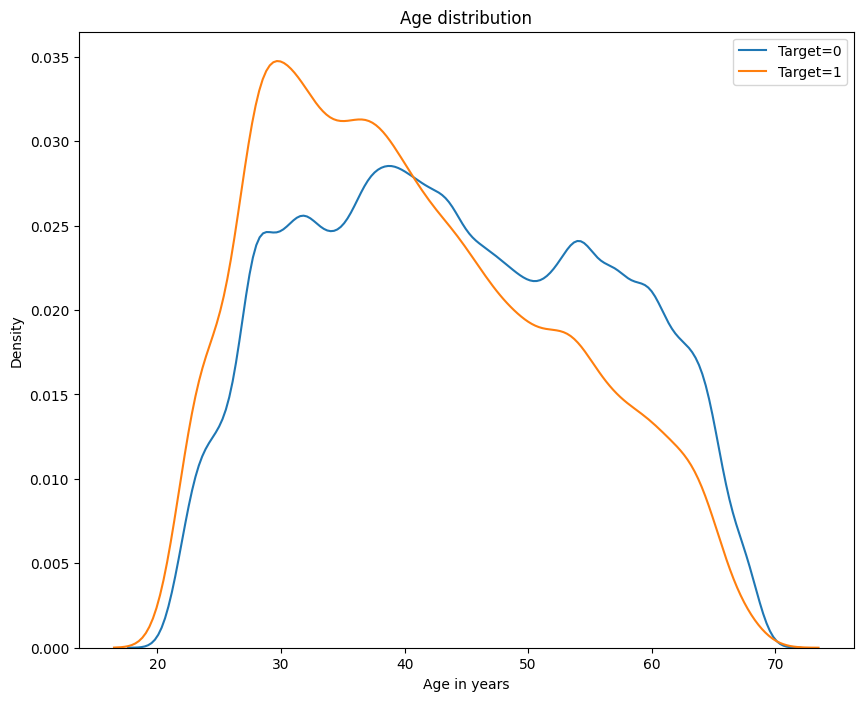

In [44]:
# KDE plot by Age (two lines for values of Target)
plt.figure(figsize=(10,8))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH']/365, label='Target=0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH']/365, label='Target=1')

plt.title('Age distribution');
plt.xlabel('Age in years');
plt.ylabel('Density');
plt.legend();

In [45]:
# Age dataframe
age_data = app_train[['DAYS_BIRTH', 'TARGET']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365 # Add a year column
age_data['BINNED_YEARS'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20,70,num=11)) # Add a years bins column
age_data.head(10)

,DAYS_BIRTH,TARGET,YEARS_BIRTH,BINNED_YEARS
0,9461,1,25.920548,"(25.0, 30.0]"
1,16765,0,45.931507,"(45.0, 50.0]"
2,19046,0,52.180822,"(50.0, 55.0]"
3,19005,0,52.068493,"(50.0, 55.0]"
4,19932,0,54.608219,"(50.0, 55.0]"
5,16941,0,46.413699,"(45.0, 50.0]"
6,13778,0,37.747945,"(35.0, 40.0]"
7,18850,0,51.643836,"(50.0, 55.0]"
8,20099,0,55.065753,"(55.0, 60.0]"
9,14469,0,39.641096,"(35.0, 40.0]"


In [46]:
# Group by age bins
age_groups = age_data.groupby('BINNED_YEARS').mean()
age_groups

,DAYS_BIRTH,TARGET,YEARS_BIRTH
BINNED_YEARS,,,
"(20.0, 25.0]",8532.795625,0.123036,23.377522
"(25.0, 30.0]",10155.219250,0.111436,27.822518
"(30.0, 35.0]",11854.848377,0.102814,32.479037
"(35.0, 40.0]",13707.908253,0.089414,37.555913
"(40.0, 45.0]",15497.661233,0.078491,42.459346
"(45.0, 50.0]",17323.900441,0.074171,47.462741
"(50.0, 55.0]",19196.494791,0.066968,52.593136
"(55.0, 60.0]",20984.262742,0.055314,57.491131
"(60.0, 65.0]",22780.547460,0.052737,62.412459


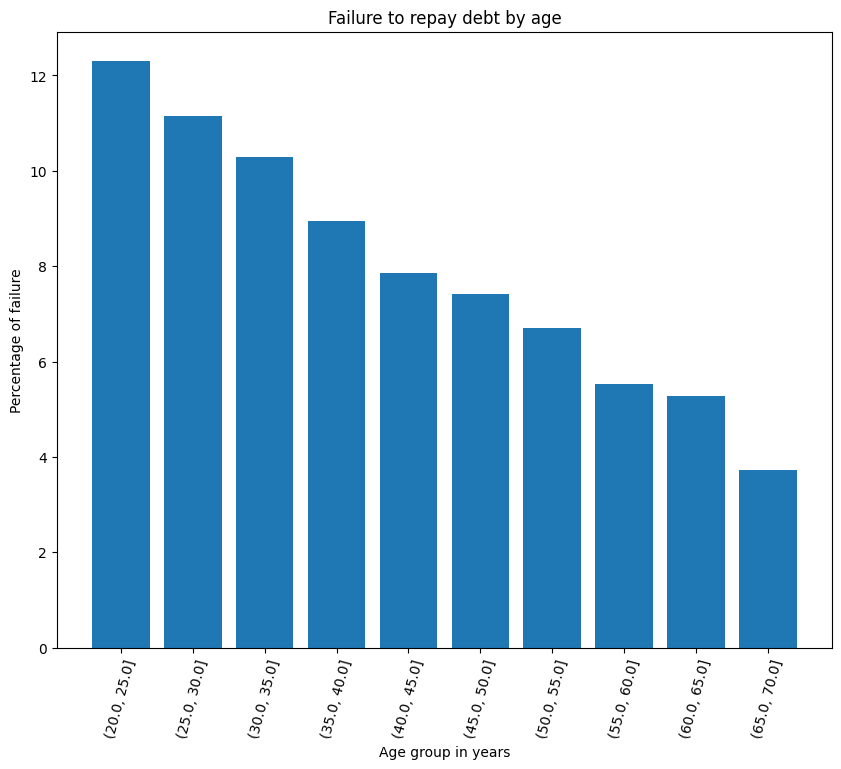

In [47]:
# Plot age_groups data
plt.figure(figsize=(10,8))

plt.bar(age_groups.index.astype(str), age_groups['TARGET']*100) # Make a bar plot

plt.xticks(rotation=75);
plt.xlabel('Age group in years');
plt.ylabel('Percentage of failure');
plt.title('Failure to repay debt by age');

In [48]:
# Look at descriptions
print(col_desc.loc['EXT_SOURCE_1'])
print(col_desc.loc['EXT_SOURCE_2'])
print(col_desc.loc['EXT_SOURCE_3'])

Description    Normalized score from external data source
Name: EXT_SOURCE_1, dtype: object
Description    Normalized score from external data source
Name: EXT_SOURCE_2, dtype: object
Description    Normalized score from external data source
Name: EXT_SOURCE_3, dtype: object


In [49]:
# Make a correlation table with EXT_SOURCES, TARGET and DAYS_BIRTH
ext_data = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corr = ext_data.corr()
ext_data_corr

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

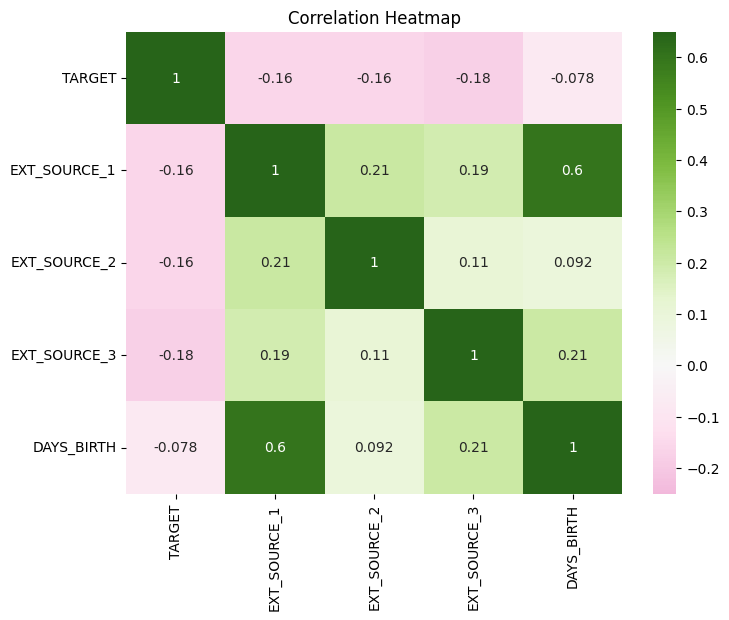

In [50]:
# Plot correlation heatmap
plt.figure(figsize=(8,6))

sns.heatmap(ext_data_corr, vmin=-0.25, vmax=0.65, annot=True, cmap='PiYG', center=0)
plt.title('Correlation Heatmap')

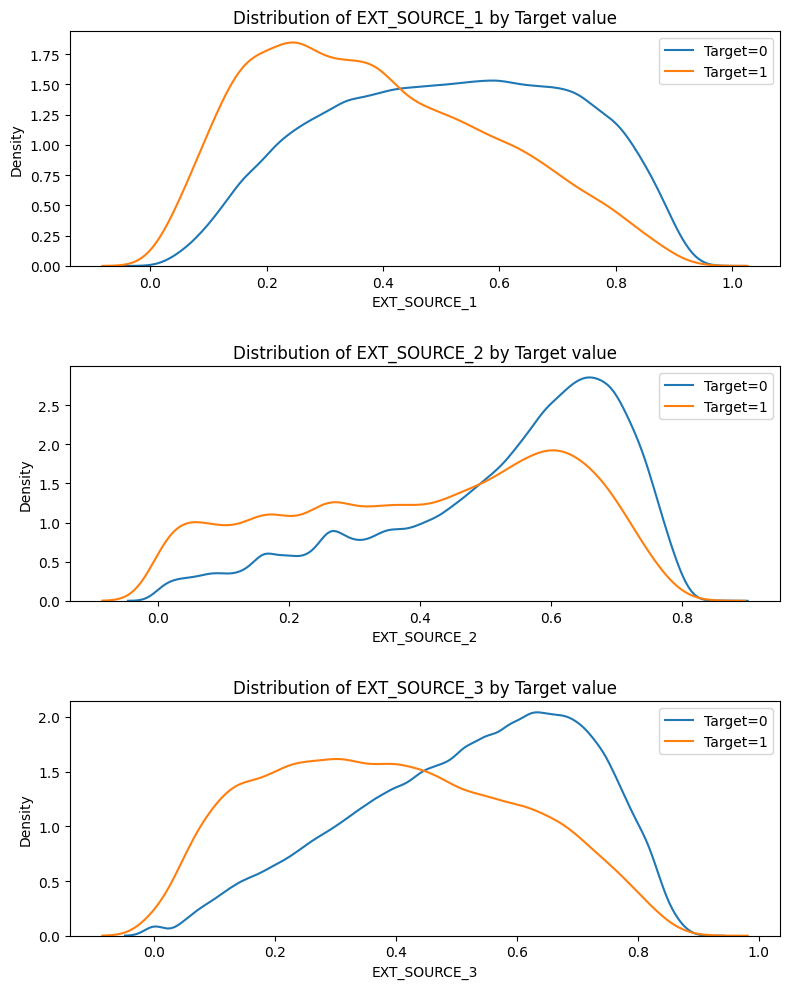

In [51]:
# Make KDE plots for EXT_SOURCES (for TARGET values)
plt.figure(figsize=(8,10))

for i, var in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3,1,i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET']==0, var], label='Target=0') # repaid loan
    sns.kdeplot(app_train.loc[app_train['TARGET']==1, var], label='Target=1') # non-repaid loan
    
    plt.title('Distribution of {} by Target value'.format(var));
    plt.xlabel('{}'.format(var));
    plt.ylabel('Density');
    plt.legend();
    
plt.tight_layout(h_pad = 2.5)

# Feature Engineering

In [55]:
# Make some polynomial features starting from EXT_SOURCES and DAYS_BIRTH
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']] # Make a new training dataframe
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']] # Make a new test dataframe

# Import sklearn functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy="median") # Initialize imputer
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns=['TARGET'])

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_features_test)

# Polynomial features
poly_transformer = PolynomialFeatures(degree=3) # Initialize polynomial features object
poly_transformer.fit(poly_features) # Train object
poly_features = poly_transformer.transform(poly_features) # Transform training df
poly_features_test = poly_transformer.transform(poly_features_test) # Transform test df

print('Polynomial Features shape: ', poly_features.shape)


Polynomial Features shape:  (307511, 35)


In [59]:
# Get new columns names
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2', 'EXT_SOURCE_1^3',
       'EXT_SOURCE_1^2 EXT_SOURCE_2', 'EXT_SOURCE_1^2 EXT_SOURCE_3',
       'EXT_SOURCE_1^2 DAYS_BIRTH', 'EXT_SOURCE_1 EXT_SOURCE_2^2',
       'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
       'EXT_SOURCE_1 EXT_SOURCE_3^2',
       'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_1 DAYS_BIRTH^2', 'EXT_SOURCE_2^3',
       'EXT_SOURCE_2^2 EXT_SOURCE_3', 'EXT_SOURCE_2^2 DAYS_BIRTH',
       'EXT_SOURCE_2 EXT_SOURCE_3^2',
       'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_2 DAYS_BIRTH^2', 'EXT_SOURCE_3^3',
       'EXT_SOURCE_3^2 DAYS_BIRTH', 'EXT_SOURCE_3 DAYS_BIR

In [61]:
# Check correlations among polynomial features
poly_features = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])) # Create a dataframe
poly_features['TARGET'] = poly_target # Put back target column

poly_corr = poly_features.corr()['TARGET'].sort_values() # Find correlations with target

print("Most positive correlations:\n", poly_corr.tail(10))
print("\n Most negative correlations:\n", poly_corr.head(10))

Most positive correlations:
 EXT_SOURCE_1                -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH   -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2   -0.094913
EXT_SOURCE_1^2              -0.091034
EXT_SOURCE_1^3              -0.083005
DAYS_BIRTH                  -0.078239
DAYS_BIRTH^2                -0.076672
DAYS_BIRTH^3                -0.074273
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64

 Most negative correlations:
 EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: 

In [63]:
# Make a copy of train/test_app with new features
poly_features_test = pd.DataFrame(poly_features_test, columns=poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])) # Create a dataframe for test

poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR'] # Add index column to poly train
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR'] # Add index column to poly test

app_train_poly = app_train.merge(poly_features, on='SK_ID_CURR', how='left') # Merge train
app_test_poly = app_test.merge(poly_features_test, on='SK_ID_CURR', how='left') # Merge test

app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join="inner", axis=1) # keep only common columns
app_train_poly['TARGET'] = poly_target # put back the target column

print("Training Poly shape: ", app_train_poly.shape)
print("Test Poly shape: ", app_test_poly.shape)


Training Poly shape:  (307511, 276)
Test Poly shape:  (48744, 275)


In [64]:
# Make new financial features
app_train_domain = app_train.copy() # Copy app_train/test
app_test_domain = app_test.copy()

# New features for training
app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL'] # Percentage of the credit amount relative to a client's income
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL'] # Percentage of the loan annuity relative to a client's income
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT'] # length of the payment in months (since the annuity is the monthly amount due)
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH'] # Percentage of the days employed relative to the client's age

# Same features for test
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

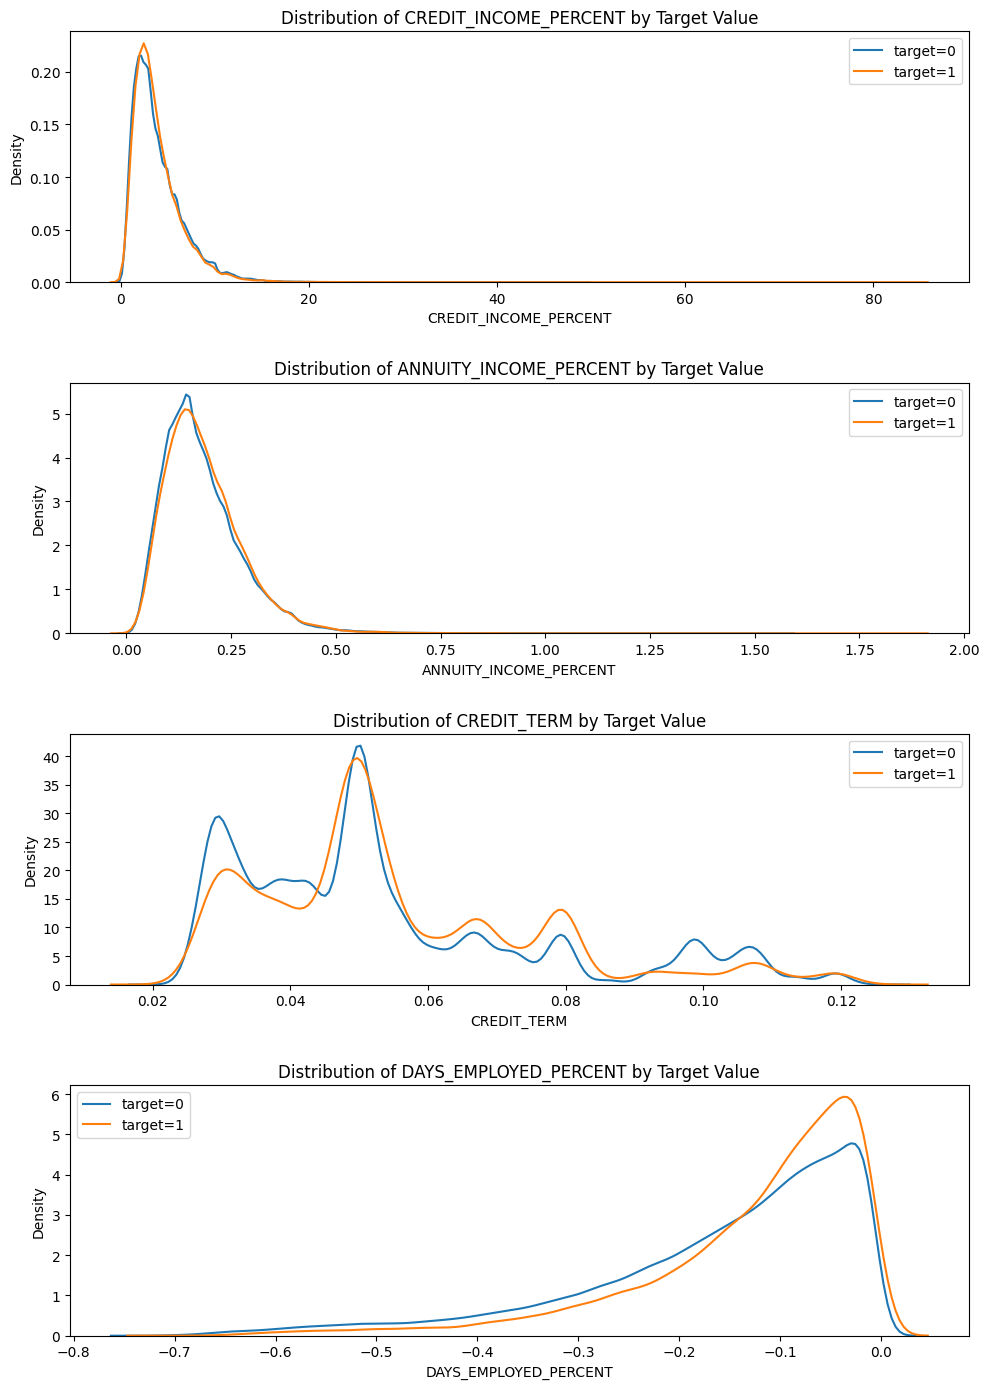

In [65]:
# Plot the new variables
plt.figure(figsize=(10,14))

for i, var in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4,1,i+1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0, var], label='target=0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1, var], label='target=1')
    
    plt.title('Distribution of {} by Target Value'.format(var))
    plt.xlabel('{}'.format(var));
    plt.ylabel('Density');
    plt.legend();
    
plt.tight_layout(h_pad = 2.5)

# Modelling

In [66]:
# Preprocessing: imputation and feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop target column and copy app_train
if 'TARGET' in app_train:
    train = app_train.drop(columns=['TARGET'])
else:
    train = app_train.copy()

features = list(train.columns) # Feature names

test = app_test.copy() # Copy test

imputer = SimpleImputer(strategy='median') # Initializing median imputer
scaler = MinMaxScaler(feature_range=(0,1)) # Initializing scaler (variables from 0 to 1)

imputer.fit(train) # Fit imputer
train = imputer.transform(train) # Transfrom train data
test = imputer.transform(test) # Transform test data

scaler.fit(train) # Fit scaler
train = scaler.transform(train) # Transfrom train data
test = scaler.transform(test) # Transform test data

print('Transformed train data shape: ', train.shape)
print('Transformed test data shape: ', test.shape)

Transformed train data shape:  (307511, 240)
Transformed test data shape:  (48744, 240)


In [72]:
# Train and Val split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target_col, test_size=0.2, random_state=42)

In [76]:
# Implement Logistic Regression
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression() # Initialize log regression with regularization parameter C

regressor.fit(X_train, y_train)

LogisticRegression()

In [77]:
# Validation accuracy

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the validation set
y_pred = regressor.predict(X_val)

# Calculate validation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.919337268100743
Precision: 0.45161290322580644
Recall: 0.011315417256011316
F1 Score: 0.022077666075300612
